# William Jardee
## Homework 6: Solving an ODE Using Eulers Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializing constants
EPSILON = 8.85e-12  #C^2/N*m^2
K = 1/(4*np.pi*EPSILON)   #C^2/N*m^2

#Initializing Variables (univseral)
Q = 0.2400 #micro Coulumbs
Q = Q *10e-6  #Coulumbs
S = 1.200  #milli Couumbs / meters^2
S = S *10e-3  #Coulumbs /meters^2
V_0 = 0 
D = 1.000e-2 #m
A = 0.273e-2 #m
R = 0.146e-2 #m

In [3]:
import numpy as np
def euler_1d(y0, t0,  tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """

    t = np.arange(t0, tf+dt, dt)   #starts at t0 and makes steps of size dt. Does not
                                   #get to tf.
        
    n_steps = len(t)        #Number of steps to take
    
    y = np.zeros(n_steps)   #I want to make an array of zeros that I'll then put
                            #y-values into. This is a good practice because it
                            #forces the computer to allocate enough memory for the
                            #final answer and can prevent memory problems
 
    #Set the first element of the array to be our input starting value y0
    y[0] = y0
    for n in range(n_steps-1):
        f = deriv_func(y[n], t[n])  #Evaluate the function f(y,t)
        y[n+1] = (y[n] + dt * f)    #This is the Euler's method part.
    return t, y

The following equations were used:<Br>
$E_{plates} = \frac{\sigma}{\epsilon_0}$<Br>
    For a sphere, if r > R:
$E_{sphere} = \frac{kQ}{r^2}$<Br>
    Otherwise:
$E_{sphere} = 0$
    <Br><Br>
    For the voltages:<Br>
$V_{plates} = E \cdot d$<Br>
$V_{sphere} = \frac{kQ}{r}$, Where $r=R$ when inside the sphere

In [4]:
#The E-Field between plates is a constant
def E_plates(v,x):     #V and X are given as formalities to let the euler formula work
    return S/EPSILON

#The E-field outside a spherical shell is kq/r^2, and 0 inside of it. 
def E_sphere(v,x):
    if np.abs(r := A-x) > R:    #Here is a walrus operator is used to hold on to the radius
        #The direcitonality is pulled out here
         return Q*K/(r**2) if r > 0 else -Q*K/(r**2)
    else:
        return 0

#Using superposition the total E-field can be summed together
def total_E(v,x):
    return E_plates(v,x) + E_sphere(v,x)

#The calculation of voltage between parallel plates
def analytic_V_plates(x):
    return E_plates(0,0)*x     #an arbitrary (0,0) point is used for the E-field bc it is constant

#The calculation of voltage around a spherical shell
def analytic_V_sphere(x):
    #derivation is nicely layed out at http://www.phys.uri.edu/gerhard/PHY204/tsl94.pdf
    return np.abs(K*Q/r) if np.abs(r := x-A) > R else K*Q/R
    
#Using superposition the total Voltage-potential can be summed together
#The initial value is subtracted to recenter everything at V(0) = 0; this would be better done as a static
#initialized variable at the beginning of the main fuction, but I left it like this to be more readable
def analytic_V(x):
    return analytic_V_plates(x)+analytic_V_sphere(x) - (analytic_V_plates(0)+analytic_V_sphere(0))

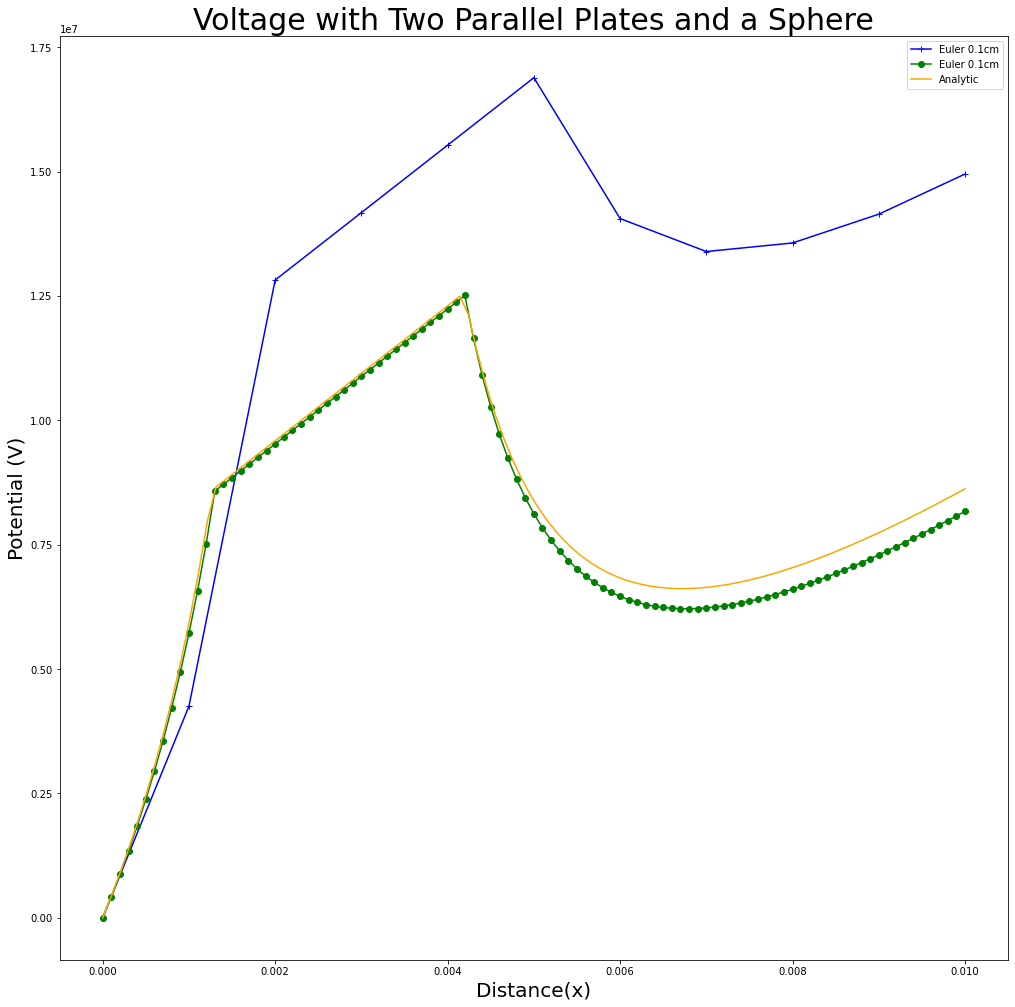

In [5]:
#Plotting all three on the same plot - very boring

x = np.linspace(0,D,int(D/0.1e-3))
analytic_V_vec= np.vectorize(analytic_V)

plt.figure(figsize = (17,17))
plt.plot(euler_1d(V_0,0,D,0.1e-2,total_E)[0], euler_1d(V_0,0,D,0.1e-2,total_E)[1],color = "blue", marker = "+", 
         label = "Euler 0.1cm") 
plt.plot(euler_1d(V_0,0,D,0.01e-2,total_E)[0], euler_1d(V_0,0,D,0.01e-2,total_E)[1], color = "green", marker = "o", 
         label = "Euler 0.1cm") 
plt.plot(x, analytic_V_vec(x), color = "orange", label = "Analytic") 
plt.title("Voltage with Two Parallel Plates and a Sphere", size= 30)
plt.ylabel("Potential (V)", size = 20)
plt.xlabel("Distance(x)", size = 20)

plt.legend()

plt.show()


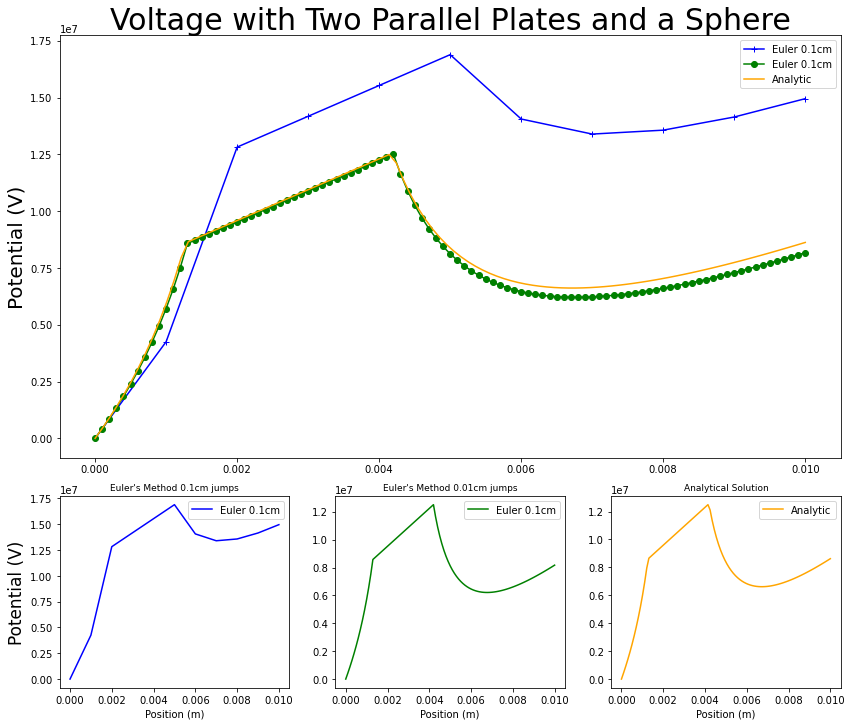

In [6]:
#Using subplots to show all three individually, then all together. 
#Without going too deep into subplot and spacings, its hard to get labels spaced well. I did my best to have it make sense

#Setting up grids and assigning plots
gridsize = (3, 3)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax4 = plt.subplot2grid(gridsize, (2, 2))

#Plotting all on the big plot
ax1.plot(euler_1d(V_0,0,D,0.1e-2,total_E)[0], euler_1d(V_0,0,D,0.1e-2,total_E)[1], color = "blue", marker = "+", 
         label = "Euler 0.1cm") 
ax1.plot(euler_1d(V_0,0,D,0.01e-2,total_E)[0], euler_1d(V_0,0,D,0.01e-2,total_E)[1], color = "green", marker = "o", 
         label = "Euler 0.1cm") 
ax1.plot(x, analytic_V_vec(x), color = "orange", label = "Analytic") 

#Plotting all the individaul plots
ax2.plot(euler_1d(V_0,0,D,0.1e-2,total_E)[0], euler_1d(V_0,0,D,0.1e-2,total_E)[1], color = "blue", label = "Euler 0.1cm") 
ax3.plot(euler_1d(V_0,0,D,0.01e-2,total_E)[0], euler_1d(V_0,0,D,0.01e-2,total_E)[1], color = "green", label = "Euler 0.1cm") 
ax4.plot(x, analytic_V_vec(x), color = "orange", label = "Analytic") 

#Setting labels
ax1.set_title("Voltage with Two Parallel Plates and a Sphere", size= 30)
ax1.set_ylabel("Potential (V)", size = 20)

ax2.set_title("Euler's Method 0.1cm jumps", size = 9)
ax2.set_ylabel("Potential (V)", size = 17)
ax2.set_xlabel("Position (m)")
ax3.set_title("Euler's Method 0.01cm jumps", size = 9)
ax3.set_xlabel("Position (m)")
ax4.set_title("Analytical Solution", size = 9)
ax4.set_xlabel("Position (m)")

#Showing
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()